In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [93]:
fishnet_poi_density = pd.read_excel('poi_fishnet.xlsx')
fishnet_poi_density

,Type_CN,Type_code,business_area,district_12,town,pop_densit,Shape_Leng,Shape_Area,fid_fishne
0,汽车服务;加油站;中国石化,10101,城隍庙,黄浦区,豫园街道,37182.676784,6579.541477,2.688029e+06,2194.0
1,汽车服务;加油站;中国石化,10101,南浦大桥,黄浦区,半淞园路街道,22954.082583,6579.541477,2.688029e+06,2149.0
2,汽车服务;加油站;中国石化,10101,制造局路,黄浦区,五里桥街道,19455.993880,6579.541477,2.688029e+06,2102.0
3,汽车服务;加油站;中国石油,10102,五里桥,黄浦区,打浦桥街道,27130.668385,6579.541477,2.688029e+06,2148.0
4,汽车服务;加油站;中国石化,10101,五里桥,黄浦区,五里桥街道,19455.993880,6579.541477,2.688029e+06,2101.0
...,...,...,...,...,...,...,...,...,...
589625,通行设施;临街院门;临街院正门,991401,中国(上海)自由贸易试验区临港新片区,奉贤区,奉城镇,1180.989241,6579.541477,2.688029e+06,781.0
589626,通行设施;临街院门;临街院正门,991401,中国(上海)自由贸易试验区临港新片区,奉贤区,青村镇,895.140453,6579.541477,2.688029e+06,715.0
589627,通行设施;临街院门;临街院正门,991401,中国(上海)自由贸易试验区临港新片区,奉贤区,上海市奉贤区海湾旅游区,359.765667,6579.541477,2.688029e+06,205.0
589628,通行设施;临街院门;临街院正门,991401,中国(上海)自由贸易试验区临港新片区,奉贤区,四团镇,812.006707,6579.541477,2.688029e+06,848.0


In [155]:
fishnet_town_map = {}
for i in range(2915):
    town_map = fishnet_poi_density[fishnet_poi_density.fid_fishne == i]
    f_town = town_map.drop_duplicates('town', 'first')
    f_town_list = np.array(f_town.town)
    fishnet_town_map[i] = f_town_list
fishnet_town_map




{0: array(['石化街道'], dtype=object),
 1: array(['石化街道'], dtype=object),
 2: array(['石化街道'], dtype=object),
 3: array(['石化街道'], dtype=object),
 4: array(['石化街道'], dtype=object),
 5: array([], dtype=object),
 6: array(['金山卫镇', '石化街道'], dtype=object),
 7: array(['金山卫镇', '石化街道'], dtype=object),
 8: array(['金山卫镇', '石化街道'], dtype=object),
 9: array(['石化街道'], dtype=object),
 10: array(['石化街道'], dtype=object),
 11: array(['石化街道'], dtype=object),
 12: array([], dtype=object),
 13: array(['金山卫镇'], dtype=object),
 14: array(['金山卫镇'], dtype=object),
 15: array(['金山卫镇', '石化街道'], dtype=object),
 16: array(['石化街道', '金山卫镇'], dtype=object),
 17: array(['石化街道', '金山卫镇'], dtype=object),
 18: array(['石化街道', '山阳镇'], dtype=object),
 19: array(['山阳镇'], dtype=object),
 20: array([], dtype=object),
 21: array(['金山卫镇'], dtype=object),
 22: array(['金山卫镇'], dtype=object),
 23: array(['金山卫镇'], dtype=object),
 24: array(['金山卫镇'], dtype=object),
 25: array(['金山卫镇', '石化街道', '山阳镇'], dtype=object),
 26: array(['石化街道', '山阳

In [200]:
fishnet_district_map = {}
for i in range(2915):
    district_map = fishnet_poi_density[fishnet_poi_density.fid_fishne == i]
    f_district = district_map.drop_duplicates('district_12', 'first')
    f_district_list = np.array(f_district.district_12)
    fishnet_district_map[i] = f_district_list
fishnet_district_map


{0: array(['金山区'], dtype=object),
 1: array(['金山区'], dtype=object),
 2: array(['金山区'], dtype=object),
 3: array(['金山区'], dtype=object),
 4: array(['金山区'], dtype=object),
 5: array([], dtype=object),
 6: array(['金山区'], dtype=object),
 7: array(['金山区'], dtype=object),
 8: array(['金山区'], dtype=object),
 9: array(['金山区'], dtype=object),
 10: array(['金山区'], dtype=object),
 11: array(['金山区'], dtype=object),
 12: array([], dtype=object),
 13: array(['金山区'], dtype=object),
 14: array(['金山区'], dtype=object),
 15: array(['金山区'], dtype=object),
 16: array(['金山区'], dtype=object),
 17: array(['金山区'], dtype=object),
 18: array(['金山区'], dtype=object),
 19: array(['金山区'], dtype=object),
 20: array([], dtype=object),
 21: array(['金山区'], dtype=object),
 22: array(['金山区'], dtype=object),
 23: array(['金山区'], dtype=object),
 24: array(['金山区'], dtype=object),
 25: array(['金山区'], dtype=object),
 26: array(['金山区'], dtype=object),
 27: array(['金山区'], dtype=object),
 28: array(['金山区'], dtype=object),
 29: array

In [10]:
# fishnet_poi_density[fishnet_poi_density.town == '豫园街道']
towns = fishnet_poi_density.drop_duplicates('town', 'first')
towns = np.array(towns.town)
towns

array(['豫园街道', '半淞园路街道', '五里桥街道', '打浦桥街道', '南京东路街道', '瑞金二路街道', '淮海中路街道',
       '外滩街道', '小东门街道', '老西门街道', '静安寺街道', '湖南路街道', '南京西路街道', '北站街道',
       '提篮桥街道', '徐家汇街道', '虹梅路街道', '田林街道', '康健新村街道', '龙华街道', '漕河泾街道',
       '华泾镇', '长桥街道', '斜土路街道', '漕河泾新兴技术开发区', '凌云路街道', '天平路街道', '枫林路街道',
       '虹桥街道', '七宝镇', '新华路街道', '古美街道', '梅陇镇', '江苏路街道', '华阳路街道', '程家桥街道',
       '北新泾街道', '新泾镇', '仙霞新村街道', '周家桥街道', '天山路街道', '虹桥镇', '长风新村街道',
       '长寿路街道', '曹家渡街道', '长征镇', '华漕镇', '江桥镇', '新虹街道', '江宁路街道', '彭浦镇',
       '大宁路街道', '天目西路街道', '彭浦新村街道', '芷江西路街道', '石门二路街道', '临汾路街道', '共和新路街道',
       '宝山路街道', '高境镇', '康桥镇', '广中路街道', '四川北路街道', '大场镇', '宜川路街道', '江湾镇街道',
       '曹杨新村街道', '桃浦镇', '真如镇', '甘泉路街道', '真新街道', '石泉路街道', '南翔镇',
       '宝山城市工业园区', '曲阳路街道', '嘉兴路街道', '凉城新村街道', '欧阳路街道', '平凉路街道', '四平路街道',
       '五角场街道', '殷行街道', '江浦路街道', '控江路街道', '五角场镇', '定海路街道', '大桥街道',
       '新江湾城街道', '长白新村街道', '延吉新村街道', '淞南镇', '金杨新村街道', '洋泾街道', '高桥镇',
       '莘庄工业区', '莘庄镇', '颛桥镇', '浦江镇', '江川路街道', '马桥镇', '吴泾镇', '车墩镇', '九亭镇',
       '航

In [18]:
town_fishnet_map = {}
for t in towns:
    f = fishnet_poi_density[fishnet_poi_density.town == t]
    town_f = f.drop_duplicates('fid_fishne', 'first')
    town_f_list = np.array(town_f.fid_fishne, dtype=np.int16)
    print(t, town_f_list)
    town_fishnet_map[t] = town_f_list


豫园街道 [2194 2239 2240 2195]
半淞园路街道 [2149 2150 2102 2148 2103]
五里桥街道 [2102 2101 2149 2148]
打浦桥街道 [2148 2149 2147 2194 2101]
南京东路街道 [2239 2194 2284 2283 2238]
瑞金二路街道 [2193 2194 2147 2148]
淮海中路街道 [2194 2239 2148 2195]
外滩街道 [2285 2240 2239 2284]
小东门街道 [2150 2240 2195 2196 2241 2149]
老西门街道 [2148 2195 2149 2194]
静安寺街道 [2192 2237 2193]
湖南路街道 [2193 2147 2146 2192]
南京西路街道 [2239 2193 2238 2192 2237 2194]
北站街道 [2284 2283 2328 2285]
提篮桥街道 [2285 2330 2329 2331 2374 2286]
徐家汇街道 [2099 2098 2052 2051 2146 2004 2145]
虹梅路街道 [2001 2002 2050 1902 1953 2049 1952 2003]
田林街道 [2003 2050 2051 2098 2004 2002 2097 2052]
康健新村街道 [1903 1953 1954 1904 2003 1850]
龙华街道 [2004 1955 1956 1906 2005 1905 2052 2053]
漕河泾街道 [1905 1954 1904 2004 1955 2003 2052]
华泾镇 [1790 1728 1663 1791 1727 1662 1792]
长桥街道 [1906 1853 1852 1851 1905 1904 1791 1790]
斜土路街道 [2053 2101 2054 2100 2147 2005 2148]
漕河泾新兴技术开发区 [1952 2002 2001 1953 2050 2049]
凌云路街道 [1789 1851 1850 1904 1790 1852 1903 1788]
天平路街道 [2147 2146 2099 2100]
枫林路街道 [2100 2099 2052

In [99]:
districts = fishnet_poi_density.drop_duplicates('district_12', 'first')
districts = np.array(districts.district_12)
districts


array(['黄浦区', '静安区', '徐汇区', '闸北区', '虹口区', '长宁区', '闵行区', '普陀区', '嘉定区',
       '宝山区', '浦东新区', '杨浦区', '松江区', '奉贤区', '青浦区', nan, '崇明县', '金山区'],
      dtype=object)

In [106]:
district_fishnet_map = {}

for d in districts:
    # print(d)
    f = fishnet_poi_density[fishnet_poi_density.district_12 == d]
    # print(f)
    district_f = f.drop_duplicates('fid_fishne', 'first')
    district_f_list = np.array(district_f.fid_fishne, dtype=np.int16)
    print(d, district_f_list)
    district_fishnet_map[d] = district_f_list


黄浦区 [2194 2149 2102 2148 2101 2239 2193 2285 2150 2240 2195 2284 2196 2241
 2147 2283 2238 2103]
静安区 [2192 2239 2236 2237 2238 2193 2283 2282 2191 2194]
徐汇区 [2193 2099 2001 2003 1903 2098 2002 2004 2050 1905 1790 1953 1955 2051
 1728 1906 2053 1853 2101 1956 1954 1952 1904 1852 2052 1789 1851 2147
 2005 2054 1850 1663 1791 1902 2146 2100 2192 2049 1727 2097 1662 2148
 1792 2145 1788]
闸北区 [2284 2450 2489 2327 2490 2412 2451 2564 2452 2328 2371 2411 2372 2283
 2370 2488 2413 2525 2563 2528 2526 2527 2562 2282 2326 2565 2369 2449
 2285]
虹口区 [2285 2413 2328 2490 2372 2454 2330 2528 2491 2373 2414 2492 2415 2374
 2329 2453 2452 2416 2331 2493 2284 2286 2455 2529]
长宁区 [2098 2145 2146 2144 2047 2188 2142 2186 2140 2141 2143 2094 2093 2191
 2192 2189 2095 2097 2096 2190 2046 2236 2187 2232 2048 2231 2276 2235]
闵行区 [1898 1952 1850 2095 2096 2048 2186 2047 2044 1846 1593 1788 1658 1659
 1531 1901 1660 1999 1214 2091 2000 1949 1785 1661 1951 1950 1784 1598
 1595 1467 1466 1207 1205 1536 2050 1532

In [19]:
town_fishnet_map

{'豫园街道': array([2194, 2239, 2240, 2195], dtype=int16),
 '半淞园路街道': array([2149, 2150, 2102, 2148, 2103], dtype=int16),
 '五里桥街道': array([2102, 2101, 2149, 2148], dtype=int16),
 '打浦桥街道': array([2148, 2149, 2147, 2194, 2101], dtype=int16),
 '南京东路街道': array([2239, 2194, 2284, 2283, 2238], dtype=int16),
 '瑞金二路街道': array([2193, 2194, 2147, 2148], dtype=int16),
 '淮海中路街道': array([2194, 2239, 2148, 2195], dtype=int16),
 '外滩街道': array([2285, 2240, 2239, 2284], dtype=int16),
 '小东门街道': array([2150, 2240, 2195, 2196, 2241, 2149], dtype=int16),
 '老西门街道': array([2148, 2195, 2149, 2194], dtype=int16),
 '静安寺街道': array([2192, 2237, 2193], dtype=int16),
 '湖南路街道': array([2193, 2147, 2146, 2192], dtype=int16),
 '南京西路街道': array([2239, 2193, 2238, 2192, 2237, 2194], dtype=int16),
 '北站街道': array([2284, 2283, 2328, 2285], dtype=int16),
 '提篮桥街道': array([2285, 2330, 2329, 2331, 2374, 2286], dtype=int16),
 '徐家汇街道': array([2099, 2098, 2052, 2051, 2146, 2004, 2145], dtype=int16),
 '虹梅路街道': array([2001, 2002, 2050, 1

In [107]:
district_fishnet_map

{'黄浦区': array([2194, 2149, 2102, 2148, 2101, 2239, 2193, 2285, 2150, 2240, 2195,
        2284, 2196, 2241, 2147, 2283, 2238, 2103], dtype=int16),
 '静安区': array([2192, 2239, 2236, 2237, 2238, 2193, 2283, 2282, 2191, 2194],
       dtype=int16),
 '徐汇区': array([2193, 2099, 2001, 2003, 1903, 2098, 2002, 2004, 2050, 1905, 1790,
        1953, 1955, 2051, 1728, 1906, 2053, 1853, 2101, 1956, 1954, 1952,
        1904, 1852, 2052, 1789, 1851, 2147, 2005, 2054, 1850, 1663, 1791,
        1902, 2146, 2100, 2192, 2049, 1727, 2097, 1662, 2148, 1792, 2145,
        1788], dtype=int16),
 '闸北区': array([2284, 2450, 2489, 2327, 2490, 2412, 2451, 2564, 2452, 2328, 2371,
        2411, 2372, 2283, 2370, 2488, 2413, 2525, 2563, 2528, 2526, 2527,
        2562, 2282, 2326, 2565, 2369, 2449, 2285], dtype=int16),
 '虹口区': array([2285, 2413, 2328, 2490, 2372, 2454, 2330, 2528, 2491, 2373, 2414,
        2492, 2415, 2374, 2329, 2453, 2452, 2416, 2331, 2493, 2284, 2286,
        2455, 2529], dtype=int16),
 '长宁区': array([

In [136]:
each_fishnet_density = pd.read_csv('fishnet_density.csv')

each_fishnet_poi_count = each_fishnet_density['不加权POI合计']


In [137]:
each_fishnet_density


,k_index,加权合计POI,人口密度,商铺人均消费,房价,不加权POI合计,经度,纬度
0,0,0.00,1630.702341,0.0,0.0,1,134.988949,35.934485
1,1,5.90,1630.702341,0.0,0.0,8,135.006725,35.934485
2,2,0.00,1630.702341,0.0,0.0,1,135.024501,35.934485
3,3,0.00,1630.702341,0.0,0.0,3,135.042278,35.934485
4,4,3.15,1630.702341,0.0,0.0,6,135.060054,35.934485
...,...,...,...,...,...,...,...,...
2910,2910,8.11,819.770512,0.0,0.0,31,135.042278,36.977867
2911,2911,12.25,819.770512,0.0,1400000.0,19,135.060054,36.977867
2912,2912,0.00,819.770512,0.0,0.0,1,135.077830,36.977867
2913,2913,0.00,819.770512,0.0,0.0,1,135.095606,36.977867


In [138]:
town_result = pd.DataFrame(columns=['town', 'mean', 'std', 'f_list', 'f_len'])
for t, f_list in town_fishnet_map.items():
    f_density_list = []
    for f in f_list:
        f_density_list.append(each_fishnet_poi_count[f])
    mean = np.mean(f_density_list)
    std = np.std(f_density_list)
    town_result = town_result.append({'town': t, 'mean': mean, 'std': std, 'f_list':f_list, 'f_len': len(f_list)}, ignore_index=True)
town_result


/Users/chaolecheng/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/chaolecheng/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/chaolecheng/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/chaolecheng/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/chaolecheng/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,town,mean,std,f_list,f_len
0,豫园街道,4214.000000,1507.905833,"[2194, 2239, 2240, 2195]",4
1,半淞园路街道,1621.000000,1326.708257,"[2149, 2150, 2102, 2148, 2103]",5
2,五里桥街道,2131.750000,1198.349151,"[2102, 2101, 2149, 2148]",4
3,打浦桥街道,2904.000000,805.241330,"[2148, 2149, 2147, 2194, 2101]",5
4,南京东路街道,4398.000000,1227.478717,"[2239, 2194, 2284, 2283, 2238]",5
...,...,...,...,...,...
201,青村镇,72.533333,93.536351,"[714, 713, 776, 716, 344, 525, 403, 587, 464, ...",45
202,四团镇,60.750000,97.983098,"[1031, 600, 664, 786, 538, 602, 785, 476, 477,...",44
203,上海市奉贤区海湾旅游区,66.333333,94.526053,"[241, 240, 285, 286, 204, 206, 203, 170, 205, ...",21
204,庄行镇,42.608696,69.604622,"[516, 517, 580, 825, 827, 889, 579, 642, 704, ...",46


In [142]:
district_result = pd.DataFrame(columns=['district', 'mean', 'std', 'f_list', 'f_len'])
for t, f_list in district_fishnet_map.items():
    f_density_list = []
    for f in f_list:
        f_density_list.append(each_fishnet_poi_count[f])
    mean = np.mean(f_density_list)
    std = np.std(f_density_list)
    district_result = district_result.append(
        {'district': t, 'mean': mean, 'std': std, 'f_list': f_list, 'f_len': len(f_list)}, ignore_index=True)
district_result


/Users/chaolecheng/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/chaolecheng/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/chaolecheng/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/chaolecheng/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/chaolecheng/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,district,mean,std,f_list,f_len
0,黄浦区,2813.666667,1582.978557,"[2194, 2149, 2102, 2148, 2101, 2239, 2193, 228...",18
1,静安区,3820.100000,1116.383129,"[2192, 2239, 2236, 2237, 2238, 2193, 2283, 228...",10
2,徐汇区,1323.177778,1169.121575,"[2193, 2099, 2001, 2003, 1903, 2098, 2002, 200...",45
3,闸北区,1584.655172,1054.313579,"[2284, 2450, 2489, 2327, 2490, 2412, 2451, 256...",29
4,虹口区,1898.291667,927.088430,"[2285, 2413, 2328, 2490, 2372, 2454, 2330, 252...",24
5,长宁区,1534.500000,1099.856533,"[2098, 2145, 2146, 2144, 2047, 2188, 2142, 218...",28
6,闵行区,292.285714,341.921539,"[1898, 1952, 1850, 2095, 2096, 2048, 2186, 204...",238
7,普陀区,1206.909091,947.028986,"[2236, 2282, 2188, 2190, 2369, 2326, 2235, 228...",44
8,嘉定区,193.374532,307.716871,"[2276, 2277, 2444, 2405, 2278, 2315, 2820, 262...",267
9,宝山区,288.768421,362.781171,"[2564, 2526, 2450, 2411, 2563, 2565, 2527, 241...",190


In [203]:
each_fishnet_density = each_fishnet_density.assign(normalized_density_town='', normalized_density_district='')


In [207]:
import random
for l in town_result.f_list:
    for f in l:
        if each_fishnet_density.normalized_density_town[f] == '':
            town_mapped_from_fishnet = fishnet_town_map[f]
            town_mapped_from_fishnet = town_mapped_from_fishnet[random.randint(0, len(town_mapped_from_fishnet)-1)]
            try:
                mean = town_result[town_result.town == town_mapped_from_fishnet]['mean'].values[0]
                std = town_result[town_result.town ==
                              town_mapped_from_fishnet]['std'].values[0]
            except:
                continue
            # print(mean, std)
            each_fishnet_density.normalized_density_town[f] = float((each_fishnet_poi_count[f] - mean) / std)
for l in district_result.f_list:
    for f in l:
        if each_fishnet_density.normalized_density_district[f] == '':
            district_mapped_from_fishnet = fishnet_district_map[f]
            
            district_mapped_from_fishnet = district_mapped_from_fishnet[random.randint(
                0, len(district_mapped_from_fishnet)-1)]
            print(district_mapped_from_fishnet)
            try:
                mean = district_result[district_result.district ==
                                   district_mapped_from_fishnet]['mean'].values[0]
                std = district_result[district_result.district ==
                                  district_mapped_from_fishnet]['std'].values[0]
            except:
                continue
            each_fishnet_density.normalized_density_district[f] = float(
                (each_fishnet_poi_count[f] - mean) / std)
each_fishnet_density


/var/folders/sl/5s4mwzp54ynfg8dhc4hczz8w0000gn/T/ipykernel_35861/3130747628.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  each_fishnet_density.normalized_density_town[f] = float((each_fishnet_poi_count[f] - mean) / std)
/var/folders/sl/5s4mwzp54ynfg8dhc4hczz8w0000gn/T/ipykernel_35861/3130747628.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  each_fishnet_density.normalized_density_district[f] = float(


黄浦区
黄浦区
浦东新区
黄浦区
黄浦区
黄浦区
徐汇区
闸北区
浦东新区
浦东新区
黄浦区
虹口区
浦东新区
黄浦区
黄浦区
静安区
黄浦区
黄浦区
徐汇区
长宁区
静安区
普陀区
长宁区
徐汇区
徐汇区
徐汇区
闵行区
徐汇区
徐汇区
徐汇区
徐汇区
徐汇区
闵行区
徐汇区
徐汇区
徐汇区
闵行区
浦东新区
徐汇区
浦东新区
徐汇区
徐汇区
徐汇区
徐汇区
徐汇区
徐汇区
闵行区
徐汇区
浦东新区
徐汇区
闵行区
徐汇区
徐汇区
闵行区
长宁区
徐汇区
徐汇区
闵行区
长宁区
闵行区
徐汇区
徐汇区
闵行区
闸北区
闸北区
闸北区
虹口区
闸北区
闸北区
闸北区
闸北区
虹口区
闸北区
普陀区
虹口区
普陀区
宝山区
闸北区
宝山区
宝山区
闸北区
闸北区
宝山区
闸北区
普陀区
闸北区
宝山区
闸北区
虹口区
虹口区
虹口区
虹口区
虹口区
杨浦区
杨浦区
杨浦区
虹口区
虹口区
虹口区
杨浦区
杨浦区
虹口区
杨浦区
杨浦区
长宁区
长宁区
普陀区
长宁区
闵行区
长宁区
长宁区
长宁区
长宁区
长宁区
长宁区
闵行区
闵行区
长宁区
长宁区
长宁区
普陀区
闵行区
长宁区
长宁区
长宁区
松江区
青浦区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
松江区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
青浦区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
浦东新区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
嘉定区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
奉贤区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
浦东新区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
松江区
闵行区
浦东新区
浦东新区
松江区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵行区
闵

,k_index,加权合计POI,人口密度,商铺人均消费,房价,不加权POI合计,经度,纬度,normalized_density_town,normalized_density_district
0,0,0.00,1630.702341,0.0,0.0,1,134.988949,35.934485,-0.661741,-0.44393
1,1,5.90,1630.702341,0.0,0.0,8,135.006725,35.934485,-0.643756,-0.405428
2,2,0.00,1630.702341,0.0,0.0,1,135.024501,35.934485,-0.661741,-0.44393
3,3,0.00,1630.702341,0.0,0.0,3,135.042278,35.934485,-0.656603,-0.432929
4,4,3.15,1630.702341,0.0,0.0,6,135.060054,35.934485,-0.648895,-0.416428
...,...,...,...,...,...,...,...,...,...,...
2910,2910,8.11,819.770512,0.0,0.0,31,135.042278,36.977867,-0.482821,-0.710534
2911,2911,12.25,819.770512,0.0,1400000.0,19,135.060054,36.977867,-0.686655,-0.743612
2912,2912,0.00,819.770512,0.0,0.0,1,135.077830,36.977867,-0.992408,-0.793229
2913,2913,0.00,819.770512,0.0,0.0,1,135.095606,36.977867,-0.992408,-0.793229


In [209]:
each_fishnet_density.to_csv('norm_f_town_district.csv')

In [211]:
each_fishnet_density_geo = gpd.GeoDataFrame(each_fishnet_density, geometry=gpd.points_from_xy(
    each_fishnet_density['经度'], each_fishnet_density['纬度']), crs='epsg:4326')
each_fishnet_density_geo

,k_index,加权合计POI,人口密度,商铺人均消费,房价,不加权POI合计,经度,纬度,normalized_density_town,normalized_density_district,geometry
0,0,0.00,1630.702341,0.0,0.0,1,134.988949,35.934485,-0.661741,-0.44393,POINT (134.98895 35.93448)
1,1,5.90,1630.702341,0.0,0.0,8,135.006725,35.934485,-0.643756,-0.405428,POINT (135.00673 35.93448)
2,2,0.00,1630.702341,0.0,0.0,1,135.024501,35.934485,-0.661741,-0.44393,POINT (135.02450 35.93448)
3,3,0.00,1630.702341,0.0,0.0,3,135.042278,35.934485,-0.656603,-0.432929,POINT (135.04228 35.93448)
4,4,3.15,1630.702341,0.0,0.0,6,135.060054,35.934485,-0.648895,-0.416428,POINT (135.06005 35.93448)
...,...,...,...,...,...,...,...,...,...,...,...
2910,2910,8.11,819.770512,0.0,0.0,31,135.042278,36.977867,-0.482821,-0.710534,POINT (135.04228 36.97787)
2911,2911,12.25,819.770512,0.0,1400000.0,19,135.060054,36.977867,-0.686655,-0.743612,POINT (135.06005 36.97787)
2912,2912,0.00,819.770512,0.0,0.0,1,135.077830,36.977867,-0.992408,-0.793229,POINT (135.07783 36.97787)
2913,2913,0.00,819.770512,0.0,0.0,1,135.095606,36.977867,-0.992408,-0.793229,POINT (135.09561 36.97787)


Text(0.5, 1.0, 'district')

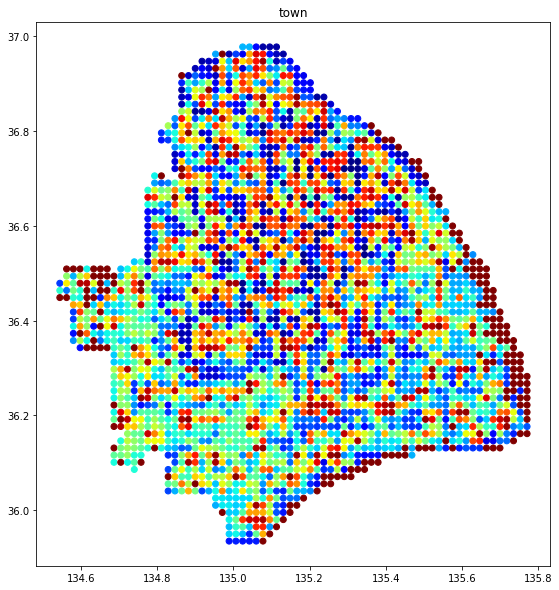

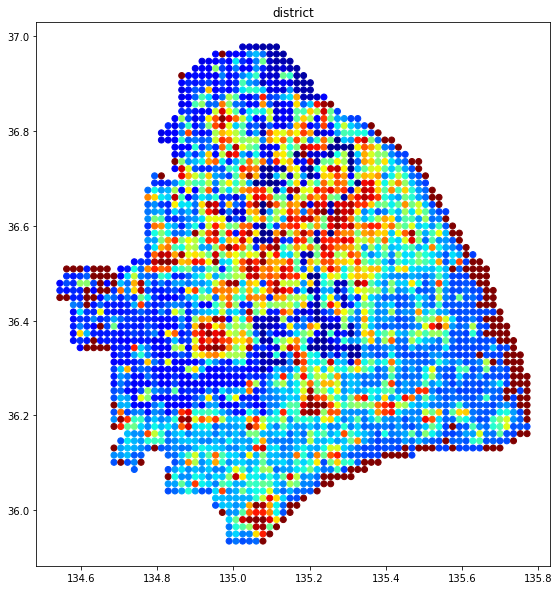

In [222]:
each_fishnet_density_geo.plot(figsize=(10, 10), cmap=plt.get_cmap(
    'jet'), column='normalized_density_town')
plt.title('town')
each_fishnet_density_geo.plot(figsize=(10, 10), cmap=plt.get_cmap(
    'jet'), column='normalized_density_district')
plt.title('district')
